### 13-1

In [1]:
import pandas as pd
# 欠損値があるままでは学習できないので欠損値処理だけ行う
df = pd.read_csv('../datafiles/cinema.csv')
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, t)

LinearRegression()

### 13-2

In [2]:
from sklearn.metrics import mean_squared_error
# 訓練データでのMSE値
pred = model.predict(x)

mse = mean_squared_error(pred, t)
mse

151986.0395762453

In [3]:
((pred-t)**2).sum()/len(pred)

151986.0395762453

### 13-3

In [4]:
import math
math.sqrt(mse) # RMSEの計算

389.8538695155472

In [5]:
# ルートに等しい
mse**0.5

389.8538695155472

### 13-4 RMSEが外れ値の影響を受けやすい事の検証

In [6]:
from sklearn.metrics import mean_absolute_error 
yosoku = [2, 3, 5, 7, 11, 13] # 予測結果をリストで作成
target = [3, 5, 8, 11, 16, 19] # 実際の結果をリストで作成

mse = mean_squared_error(yosoku, target)
print('rmse:{}'.format(math.sqrt(mse)))
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

print(sum(yosoku), sum(target))

print('外れ値の混入')
yosoku = [2, 3, 5, 7, 11, 13, 46] # 実際には23だけど46と予測
target = [3, 5, 8, 11, 16, 19, 23]
mse = mean_squared_error(yosoku, target)
print('rmse:{}'.format(math.sqrt(mse)))
print('mae:{}'.format(mean_absolute_error(yosoku, target)))

print(sum(yosoku), sum(target))


rmse:3.8944404818493075
mae:3.5
41 62
外れ値の混入
rmse:9.411239481143202
mae:6.285714285714286
87 85


In [7]:
sum(yosoku), sum(target)

(87, 85)

### 13-5

In [8]:
# データの準備
df = pd.read_csv('../datafiles/Survived.csv')
df = df.fillna(df.mean(numeric_only=True))

x = df[['Pclass', 'Age']]
t = df['Survived']

### 13-6

In [9]:
# モデルの準備
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 2,
random_state = 0)
model.fit(x, t)

DecisionTreeClassifier(max_depth=2, random_state=0)

### 13-7

In [10]:
from sklearn.metrics import classification_report
pred = model.predict(x)
out_put = classification_report(y_pred = pred, y_true = t)
print(out_put)

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       549
           1       0.56      0.70      0.62       342

    accuracy                           0.67       891
   macro avg       0.67      0.68      0.67       891
weighted avg       0.69      0.67      0.68       891



### 13-8

In [11]:
out_put = classification_report(y_pred = pred, y_true = t,
output_dict = True)

# out_putをデータフレームに変換
dfout = pd.DataFrame(out_put)
dfout

,0,1,accuracy,macro avg,weighted avg
precision,0.778742,0.558140,0.672278,0.668441,0.694066
recall,0.653916,0.701754,0.672278,0.677835,0.672278
f1-score,0.710891,0.621762,0.672278,0.666326,0.676680
support,549.000000,342.000000,0.672278,891.000000,891.000000


| 真陽性 (True Positive) | 偽陰性 (False Negative) |
|----------------------|-----------------------|
| 偽陽性 (False Positive)| 真陰性 (True Negative) |
|----------------------|-----------------------|
|        359           |         190           |
|        102           |         240           |


In [12]:
# code13-8a
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
print('Accuracy:\n',
      accuracy_score(t, pred))
print('Confusion matrix:\n',
      confusion_matrix(t, pred, labels=[0,1]))
print('Precision:\n',
      precision_score(t, pred, pos_label=0))
print('Recall:\n',
      recall_score(t, pred, pos_label=0))
print('F-measure:\n',
      f1_score(t, pred, pos_label=0))

 

Accuracy:
 0.6722783389450057
Confusion matrix:
 [[359 190]
 [102 240]]
Precision:
 0.7787418655097614
Recall:
 0.6539162112932605
F-measure:
 0.710891089108911


In [13]:
#13-8b
precision_0 = dfout.loc['precision','0']
precision_1 = dfout.loc['precision','1']
support_0 = dfout.loc['support','0']
support_1 = dfout.loc['support','1']
 
macro_avg = (precision_0 + precision_1)/2
weighted_avg = (precision_0*support_0 + precision_1*support_1)/(support_0+support_1)
 
print(round(macro_avg,6),round(weighted_avg, 6))

0.668441 0.694066


### 13-9

In [14]:
df = pd.read_csv('../datafiles/cinema.csv')
# 学習できないので欠損値処理だけ行う
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']

### 13-10

In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3, shuffle = True, random_state = 0) 
#※KFoldは偏りが生じやすいので普通は使わずStratifiedKFoldを使う

### 13-11

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.model_selection import cross_validate

result = cross_validate(model, x, t, cv = kf, scoring = 'r2',
return_train_score = True)
print(pd.DataFrame(result))

   fit_time  score_time  test_score  train_score
0  0.002001    0.001999    0.724651     0.769285
1  0.001001    0.001998    0.717408     0.763681
2  0.002000    0.001000    0.759756     0.757801


### 13-12

In [17]:
sum(result['test_score']) / len(result['test_score'])

0.7339382541774341

### 13-13

In [18]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5,
    shuffle = True,random_state = 0)

### 13-14

In [19]:
iris = pd.read_csv("../datafiles/iris.csv")
iris = iris.fillna(iris.mean(numeric_only=True))
x = iris.loc[:,:"花弁幅"]
t = iris["種類"]
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
result = cross_validate(model, x, t, cv = skf, scoring = 'accuracy',
return_train_score = True)


In [20]:
result

{'fit_time': array([0.00198603, 0.00199223, 0.00200415, 0.00400519, 0.00199866]),
 'score_time': array([0.00099969, 0.00199866, 0.00099993, 0.00299549, 0.00199986]),
 'test_score': array([0.93333333, 0.9       , 0.86666667, 0.9       , 0.93333333]),
 'train_score': array([1., 1., 1., 1., 1.])}

### 練習

In [82]:
# 練習問題
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split

# 追加
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import numpy as np #本書ではあまり紹介していないnumpyライブラリ

%matplotlib inline

df = pd.read_csv('../datafiles/Bank.csv')
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name=['job','default','marital','education','housing','loan','contact','month']
str_df = df[str_col_name]
#複数列を一気にダミー変数化
str_df2=pd.get_dummies(str_df,drop_first=True)

num_df = df.drop(str_col_name,axis=1)#数値列を抜き出す
df2 = pd.concat([num_df,str_df2,str_df],axis=1)#結合(今後の集計の利便性も考慮してstr_dfも結合しておく)
#訓練&検証データとテストデータに分割
train_val,test = train_test_split(df2,test_size=0.1,random_state=9)
train_val.head()

,id,age,amount,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
13378,13379,46,0.0,10,378.293875,1,0,1,False,False,...,False,False,unemployed,no,married,tertiary,yes,no,cellular,jul
3800,3801,41,-333.0,30,300.845752,3,2,0,True,False,...,False,False,blue-collar,no,divorced,secondary,yes,no,cellular,jan
10398,10399,30,5389.0,6,159.053623,3,0,1,False,False,...,False,False,management,no,single,tertiary,no,no,cellular,aug
23401,23402,39,255.0,5,334.802583,1,0,0,False,False,...,False,False,management,no,single,tertiary,yes,no,sending _document,may
26223,26224,47,33.0,5,NaN,1,0,1,False,False,...,False,False,services,no,single,secondary,yes,no,cellular,may


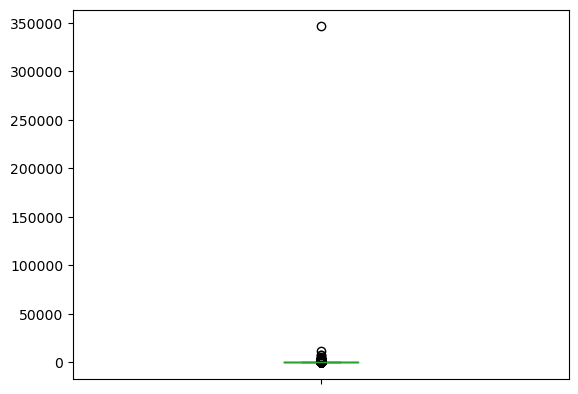

In [83]:
#欠損値の補正
from sklearn.covariance import MinCovDet
num_df=train_val.drop(str_col_name,axis=1)
num_df=num_df.drop('id',axis=1)
num_df2=num_df.dropna()
mcd2 =MinCovDet(random_state=0,support_fraction=0.7)
mcd2.fit(num_df2)
dis =mcd2.mahalanobis(num_df2)
dis=pd.Series(dis)
dis.plot(kind="box")
no=dis[dis>300000].index
#先頭から2561番目が外れ値となる事が分かったので９章の付録で紹介したilocを利用する
no=num_df2.iloc[no[0]:(no[0]+1),:].index
train_val2 = train_val.drop(no)

In [84]:
#欠損行を削除
not_nan_df = train_val2.dropna()#df2は外れ値が無いデータ
temp_t =not_nan_df[['duration']]
temp_x = not_nan_df.drop(str_col_name,axis=1)

#durationとyに関係があるという仮定が成り立つならば、適切な推定をするためには,
temp_x = temp_x.drop(['y','duration','id'],axis=1)
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso,Ridge

a,b,c,d= train_test_split(temp_x,temp_t,random_state=0,test_size=0.2)
maxvalue=0
v=0
#今回はLasso回帰を利用するので、特徴量選択はしない
for i in range(1,42):
    val = i/20
    model_liner = Lasso(random_state=0,alpha=val)
    #今回は予測させたいだけなので、標準化はしない
    model_liner.fit(a,c)
    if maxvalue < model_liner.score(b,d):
        v=val
        maxvalue = model_liner.score(b,d)
print(v,maxvalue)
model_liner = Lasso(random_state=0,alpha=v)
#今回は予測させたいだけなので、標準化はしない
model_liner.fit(a,c)
#pd.Series(model_liner)


0.15 0.7304944115519963


Lasso(alpha=0.15, random_state=0)

In [85]:
#実際に使うのは外れ値込みのデータ
train_val3 = train_val.copy()
is_null=train_val3['duration'].isnull()
temp_x = train_val3.drop(str_col_name,axis=1)
temp_x = temp_x.drop(['y','duration','id'],axis=1)
temp_x = temp_x[is_null]
#non_x=train_val2.loc[is_null,['housing_yes','loan_yes','age','marital_single','job_student']]
pred_d = model_liner.predict(temp_x)
train_val3.loc[is_null,'duration']=pred_d

In [86]:
#12章付録で紹介したアンダーサンプリングを行う
def under_sampling(train_val):
    y_0=train_val[train_val['y']==0]
    y_1=train_val[train_val['y']==1]
    num_1 = len(y_1)
    #Y=1と同じ件数だけサンプリング
    y_0_2 =y_0.sample(n=num_1,random_state=0)
    train_val2 = pd.concat([y_1,y_0_2])
    return train_val2

In [60]:
#学習をさせよう。ただし、13章で学習した知識を使いたい。これまでは正解率を考えてきたが、今回のケースだと適合率
#再現率のどちらを見るべきだろうか？

# y=1の適合率が高い⇒無駄なアポイントメントを減らす事が出来る。
# y=1の再現率が高い⇒潜在顧客を見逃さない

#スッキリ銀行は、効率よくキャンペーンを回したいと考えているので、y=1適合率に着目する

In [87]:
#まず、さくっと学習できるようなlearn関数を定義する。ただし、正解率では無くて適合率をみる
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
def learn(x,t,i):
    x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)

    datas=[x_train,x_val,y_train,y_val]
    base = DecisionTreeClassifier(max_depth=i,random_state=0,class_weight="balanced")
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    
    #　追加
    
    base.fit(x_train,y_train)
    train_pred = base.predict(x_train)
    test_pred = base.predict(x_val)
    result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result,base,datas

t =train_val3['y']
x = train_val3.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
res,model,datas = learn(x,t,i=8)
res_df=pd.DataFrame(res)
res_df
#res_df.iloc[0,1]

,0,1,accuracy,macro avg,weighted avg
precision,0.908992,0.587765,0.769199,0.748378,0.810315
recall,0.741058,0.832667,0.769199,0.786862,0.769199
f1-score,0.816479,0.689103,0.769199,0.752791,0.777351
support,3383.000000,1500.000000,0.769199,4883.000000,4883.000000


In [88]:
#適合率が低い。
# 12章で学習したランダムフォレストとアダブーストだとどうなるか？
def learn2(x,t,i,de=5,forest=True):
    x_train,x_val,y_train,y_val = train_test_split(x,t,test_size=0.2,random_state=13)

    datas=[x_train,x_val,y_train,y_val]
    model=None
    if forest:
        model = RandomForestClassifier(n_estimators=i,random_state=0,max_depth=de,class_weight="balanced")
    #datas=[x_train,x_val,y_train,y_val]
    else:
        base = DecisionTreeClassifier(max_depth=de,random_state=0,class_weight="balanced")
        model = AdaBoostClassifier(n_estimators=i,estimator=base,random_state=0)
    #model = AdaBoostClassifier(n_estimators=150,base_estimator=base,random_state=0)
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_val)
    result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result,model,datas
t =train_val3['y']
x = train_val3.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)

In [89]:
#ランダムフォレストでの検証
print("=================random_forest=========================")
max_pre=0
for i in [50,100,150,200]:#esti
    for j in range(5,11):#depth
        res,model,datas = learn2(x,t,i=i,de=j,forest=True)
        res2=pd.DataFrame(res)
        pre = res2.iloc[0,1]
        if max_pre < pre:
            max_pre=pre
            print(max_pre,i,j)
        print(i,j,pre,"finish next_i")
#アダブーストでの検証
print("=================adaboost=========================")
max_pre=0
for i in [50,100,150,200]:#esti
    for j in range(5,11):#depth
        res,model,datas = learn2(x,t,i=i,de=j,forest=False)
        res2=pd.DataFrame(res)
        pre = res2.iloc[0,1]
        if max_pre < pre:
            max_pre=pre
            print(max_pre,i,j)
        print(i,j,pre,"finish next_i")


=================random_forest=========================
0.559322033898305 50 5
50 5 0.559322033898305 finish next_i
0.5614552605703048 50 6
50 6 0.5614552605703048 finish next_i
0.5669099756690997 50 7
50 7 0.5669099756690997 finish next_i
0.5786350148367952 50 8
50 8 0.5786350148367952 finish next_i
0.5846308387744852 50 9
50 9 0.5846308387744852 finish next_i
0.5903614457831325 50 10
50 10 0.5903614457831325 finish next_i
100 5 0.5660282258064516 finish next_i
100 6 0.56575682382134 finish next_i
100 7 0.5690854870775348 finish next_i
100 8 0.5752343364578194 finish next_i
100 9 0.5838790931989924 finish next_i
100 10 0.589006555723651 finish next_i
150 5 0.5648893360160966 finish next_i
150 6 0.5663189269746647 finish next_i
150 7 0.5690936106983655 finish next_i
150 8 0.5758620689655173 finish next_i
150 9 0.5837081459270365 finish next_i
0.592741935483871 150 10
150 10 0.592741935483871 finish next_i
200 5 0.5668179525970751 finish next_i
200 6 0.5674464907914385 finish next_i
200

c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6271373414230557 50 5
50 5 0.6271373414230557 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


50 6 0.6202090592334495 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


50 7 0.6221397649969078 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


50 8 0.6059800664451828 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


50 9 0.625 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6343335659455688 50 10
50 10 0.6343335659455688 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


100 5 0.6253687315634219 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


100 6 0.6082089552238806 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


100 7 0.6286689419795222 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.651685393258427 100 8
100 8 0.651685393258427 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


100 9 0.6460791117279667 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6695035460992907 100 10
100 10 0.6695035460992907 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


150 5 0.614002478314746 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


150 6 0.6093052899936265 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


150 7 0.645473393227367 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


150 8 0.652327221438646 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6716845878136201 150 9
150 9 0.6716845878136201 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6825164594001463 150 10
150 10 0.6825164594001463 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


200 5 0.6130876747141042 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


200 6 0.626855600539811 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


200 7 0.6559888579387186 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


200 8 0.6649672250546249 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


200 9 0.6815602836879433 finish next_i


c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6906158357771262 200 10
200 10 0.6906158357771262 finish next_i


In [90]:
i

200

In [91]:
#非常に時間がかかるので途中で終了。
#random_forestよりadaboostの方がvalデータの精度が良く、その中でもestimator=100,max_depth=8が最も高い

#estimatorの値を100と固定して、max_depthについての考察を深める。k-分割交差検証
#で最適なmax_depthを考察するｂ
def learn_k_valid(x,t,i,dep):
    base = DecisionTreeClassifier(max_depth=dep,random_state=0,class_weight="balanced")
    # model = AdaBoostClassifier(n_estimators=150,estimator=base,random_state=0)
    model = AdaBoostClassifier(n_estimators=i,estimator=base,random_state=0)
    kv = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
    result = cross_validate(model,x,t,cv=kv,scoring='precision',return_train_score=True)
    
    #base.fit(x_train,y_train)
    #train_pred = base.predict(x_train)
    #test_pred = base.predict(x_val)
    #result = classification_report(y_pred=test_pred,y_true=y_val,output_dict=True)
    return result


In [92]:
t =train_val3['y']
x = train_val3.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
for j in range(2,10):
    res = learn_k_valid(x,t,i=100,dep=j)
    res2=res["train_score"]
    print(j,sum(res2)/len(res2),end="  ")#平均値    
    res3=res["test_score"]
    
    print(j,sum(res3)/len(res3))#平均値
    print(" j end next")

2 0.6851614806712366  2 0.659646069507605
 j end next
3 0.7110781452772317  3 0.6490726379921109
 j end next
4 0.7720167629129425  4 0.6362276061253913
 j end next
5 0.8698396728632231  5 0.6307379392284949
 j end next
6 0.9793518533239554  6 0.6231575207922675
 j end next
7 1.0  7 0.6305001135297129
 j end next
8 1.0  8 0.6551232942555888
 j end next
9 1.0  9 0.6804084592120869
 j end next


In [67]:
#検証データの適合率が最も良いのは深さ9だが、明らかに過学習している。
# アンダーサンプリングで不均衡データの影響が変わるか確認してみる

In [93]:
train_val4 = under_sampling(train_val3)
t =train_val4['y']
x = train_val4.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
for j in range(2,10):
    res = learn_k_valid(x,t,i=100,dep=j)
    res2=res["train_score"]
    print(j,sum(res2)/len(res2),end="  ")#平均値    
    res3=res["test_score"]
    
    print(j,sum(res3)/len(res3))#平均値
    print(" j end next")

2 0.8264622332806147  2 0.7964993479565584
 j end next
3 0.8589197345440344  3 0.7818494426428629
 j end next
4 0.9109614739925763  4 0.7622221894164145
 j end next
5 0.9785949665103897  5 0.7418067235249909
 j end next
6 1.0  6 0.7307725372355942
 j end next
7 1.0  7 0.7409418592128257
 j end next
8 1.0  8 0.7570154436321554
 j end next
9 1.0  9 0.7622830044005248
 j end next


In [81]:
#深さ2~３当たりが最もよさそうである。
#テストデータで検証するために再学習

In [94]:
train_val4=under_sampling(train_val3)
t =train_val4['y']
x = train_val4.drop(str_col_name,axis=1)
x =x.drop(['id','y','day'],axis=1)
base_model = RandomForestClassifier(max_depth=3,random_state=0,class_weight="balanced")
model = AdaBoostClassifier(random_state=0,n_estimators=100,estimator=base_model)
model.fit(x,t)

c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         max_depth=3,
                                                         random_state=0),
                   n_estimators=100, random_state=0)

In [95]:
#テストデータ
test2 = test.copy()    
isnull=test2['duration'].isnull()
print(isnull.shape)
if isnull.sum()>0:
    temp_x = test2.drop(str_col_name,axis=1)
    temp_x = temp_x.drop(['y','duration','id'],axis=1)
    temp_x = temp_x[isnull]
    pred_d = model_liner.predict(temp_x)
    test2.loc[isnull,'duration']=pred_d    
x_test = test2.drop(str_col_name,axis=1)
x_test =x_test.drop(['id','y','day'],axis=1)
y_test = test['y']

(2713,)


In [96]:
pre = model.predict(x_test)
result= classification_report(y_pred=pre,y_true=y_test,output_dict=True)
pd.DataFrame(result)

,0,1,accuracy,macro avg,weighted avg
precision,0.895679,0.640439,0.792849,0.768059,0.813923
recall,0.786876,0.805524,0.792849,0.796200,0.792849
f1-score,0.837760,0.713558,0.792849,0.775659,0.797977
support,1844.000000,869.000000,0.792849,2713.000000,2713.000000


In [72]:
#y=1の適合率は0.64

In [97]:

#本書で紹介していないnumpyのテクニックを使っているが
#同様の事はpandasでもできる
#参考　予測確率の閾値を変更する事により予測結果を変えて調整する
#確率でいったん予測させる
y_p = model.predict_proba(x)
y_p
a=y_p[:,1]#y=1の確率を抜き出す
def conf(a,th=0.5):
    import numpy as np
    y_pre=np.where(a<th,0,1)#閾値以下なら0,以上なら1
    from sklearn.metrics import confusion_matrix
    #混同行列をscikit-learnの関数で作成
    mat= confusion_matrix(y_pred=y_pre,y_true=t)
    pre = mat[1,1]/(mat[1,1]+mat[0,1])
    re = mat[1,1]/(mat[1,1]+mat[1,0])
    f1 = 2*(pre*re)/(pre+re)
    return pre,f1,mat#適合率、ｆ１スコア、混同行列
conf(a,0.5)#閾値0.5

(0.8325516542020535,
 0.8365280519645928,
 array([[6493, 1321],
        [1246, 6568]], dtype=int64))

In [98]:
#presitionを上げるためには閾値をもう少しあげればよい
#ただし、閾値を上げすぎると適合率が低下してしまうのでf1スコアも意識する
for i in range(1,30):
    val = 0.50+(i/1000)
    print(i)
    b=conf(a,val)#閾値0.5
    print(val,b[0],b[1])

1
0.501 0.8679299454493253 0.8181326116373479
2
0.502 0.8973109243697479 0.7757919209532113
3
0.503 0.9245689655172413 0.7306084533209476
4
0.504 0.9483044818591416 0.6647826448341784
5
0.505 0.9675578251727246 0.5781207933231626
6
0.506 0.9810003877471888 0.4868661599153276
7
0.507 0.9882111737570477 0.39487967229902715
8
0.508 0.9909659485753995 0.308224359667135
9
0.509 0.995069033530572 0.22859084730403265
10
0.51 1.0 0.17152217152217153
11
0.511 1.0 0.122537241710716
12
0.512 1.0 0.08574228319451249
13
0.513 1.0 0.05670231285749813
14
0.514 1.0 0.03766951280763435
15
0.515 1.0 0.02252309249652031
16
0.516 1.0 0.013474005338756834
17
0.517 1.0 0.008410857652606091
18
0.518 1.0 0.006378364587319811
19
0.519 1.0 0.0040868454661558105
20
0.52 1.0 0.0017900524229638153
21
0.521 1.0 0.0010232796111537478
22
0.522 1.0 0.0007675578866572853
23
0.523 1.0 0.0005117707267144319
24
0.524 1.0 0.00025591810620601403
25
0.525 nan nan
26
0.526 nan nan
27
0.527 nan nan
28
0.528 nan nan
29
0.529 na

C:\Users\user\AppData\Local\Temp\ipykernel_39668\12843953.py:14: RuntimeWarning: invalid value encountered in scalar divide
  pre = mat[1,1]/(mat[1,1]+mat[0,1])
C:\Users\user\AppData\Local\Temp\ipykernel_39668\12843953.py:14: RuntimeWarning: invalid value encountered in scalar divide
  pre = mat[1,1]/(mat[1,1]+mat[0,1])
C:\Users\user\AppData\Local\Temp\ipykernel_39668\12843953.py:14: RuntimeWarning: invalid value encountered in scalar divide
  pre = mat[1,1]/(mat[1,1]+mat[0,1])
C:\Users\user\AppData\Local\Temp\ipykernel_39668\12843953.py:14: RuntimeWarning: invalid value encountered in scalar divide
  pre = mat[1,1]/(mat[1,1]+mat[0,1])
C:\Users\user\AppData\Local\Temp\ipykernel_39668\12843953.py:14: RuntimeWarning: invalid value encountered in scalar divide
  pre = mat[1,1]/(mat[1,1]+mat[0,1])


In [99]:
#閾値を0.503にすると全体的に最もよさそう。
th=0.503
#テストデータ
proba = model.predict_proba(x_test)

In [100]:
a = proba[:,1]
pre=np.where(a<th,0,1)
result= classification_report(y_pred=pre,y_true=y_test,output_dict=True)
pd.DataFrame(result)

,0,1,accuracy,macro avg,weighted avg
precision,0.813773,0.745008,0.797272,0.779390,0.791747
recall,0.909978,0.558113,0.797272,0.734046,0.797272
f1-score,0.859191,0.638158,0.797272,0.748674,0.788392
support,1844.000000,869.000000,0.797272,2713.000000,2713.000000
